In [22]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

<h1>Twitter time series data forecast</h1>
<h1>5분 frequency</h1>

In [17]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
from gluonts.evaluation import Evaluator
from gluonts.dataset.common import ListDataset
from gluonts.mx import Trainer
from gluonts.model.deepar import DeepAREstimator
from gluonts.evaluation import make_evaluation_predictions

<h1>dataset 호출</h1>
<h1>1시간의 시간간격 데이터</h1>

In [14]:
dataset = get_dataset('m4_hourly',regenerate=True)


saving time-series into C:\Users\baesm\.mxnet\gluon-ts\datasets\m4_hourly\train\data.json
saving time-series into C:\Users\baesm\.mxnet\gluon-ts\datasets\m4_hourly\test\data.json


In [15]:
train = list(dataset.train)
test = list(dataset.test)

In [36]:
from pathlib import Path
path="C:/Users/baesm/Desktop/notebookfile/deepar"
#ar_predictor.serialize(Path())

# #load
from gluonts.model.predictor import Predictor
ar_predictor = Predictor.deserialize(Path(path))

In [37]:
forecast_is,ts_is = make_evaluation_predictions(
    dataset=dataset.test,
    predictor = ar_copied,
    #각 time serie별로 몇개의 데이터를 샘플링 할것인지
    num_samples = 100
)

In [38]:
forecast = list(forecast_is)
ts = list(ts_is)

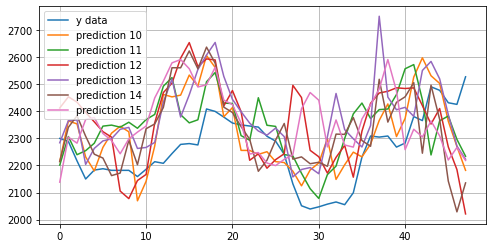

In [42]:
plt.figure(figsize=(8,4))
plt.plot(ts[100][700:].values.reshape(-1,),label='y data')
for i in range(10,16):
    plt.plot(forecast[100].samples[i], label=f'prediction {i}')
plt.legend()
plt.grid(which='both')    

In [43]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(ts), iter(forecast), num_series=len(dataset.test))

Running evaluation: 100%|███████████████████████████████████████████████████████████| 414/414 [00:01<00:00, 272.82it/s]


In [44]:
print(json.dumps(agg_metrics, indent=2))

{
  "MSE": 13568182.51669683,
  "abs_error": 10634372.433227539,
  "abs_target_sum": 145558863.59960938,
  "abs_target_mean": 7324.822041043146,
  "seasonal_error": 336.9046924038305,
  "MASE": 2.165372247500024,
  "MAPE": 0.14545795763730282,
  "sMAPE": 0.12576382718800347,
  "MSIS": 18.134931033542607,
  "QuantileLoss[0.1]": 4113508.0287795067,
  "Coverage[0.1]": 0.10633051529790659,
  "QuantileLoss[0.5]": 10634372.341585636,
  "Coverage[0.5]": 0.43583937198067635,
  "QuantileLoss[0.9]": 7043280.872813797,
  "Coverage[0.9]": 0.7940821256038647,
  "RMSE": 3683.50139360593,
  "NRMSE": 0.5028793017722726,
  "ND": 0.07305891355733336,
  "wQuantileLoss[0.1]": 0.02826009991459253,
  "wQuantileLoss[0.5]": 0.07305891292774681,
  "wQuantileLoss[0.9]": 0.048387852849606186,
  "mean_absolute_QuantileLoss": 7263720.414392981,
  "mean_wQuantileLoss": 0.04990228856398184,
  "MAE_Coverage": 0.058803005904455176,
  "OWA": NaN
}


In [46]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0.0,949.409505,1112.000732,31644.0,659.250000,42.371302,0.546754,0.033798,0.033526,3.675617,370.524371,0.041667,1112.000732,0.604167,583.659741,0.875000
1,1.0,135122.666667,15808.625977,124149.0,2586.437500,165.107988,1.994733,0.142055,0.129805,20.085414,13858.860913,0.833333,15808.625732,1.000000,5101.165771,1.000000
2,2.0,69305.968750,10711.964844,65030.0,1354.791667,78.889053,2.828858,0.151560,0.167061,63.197078,2725.003845,0.000000,10711.965332,0.000000,13724.005688,0.041667
3,3.0,196139.333333,17624.429688,235783.0,4912.145833,258.982249,1.417764,0.071499,0.072953,14.228571,5079.693799,0.291667,17624.430420,0.520833,13811.488770,0.666667
4,4.0,84047.625000,10351.773438,131088.0,2731.000000,200.494083,1.075652,0.071488,0.075566,10.205407,3907.685449,0.000000,10351.772705,0.000000,7954.008716,0.687500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,409.0,1001.164062,1192.828735,5665.0,118.020833,24.726496,1.005019,0.206437,0.225687,6.917753,421.421341,0.041667,1192.828760,0.312500,822.479955,0.625000
410,410.0,353.442952,661.096436,4968.0,103.500000,20.766026,0.663239,0.133291,0.139401,4.997381,378.864439,0.000000,661.096428,0.312500,229.695901,0.916667
411,411.0,319.000895,540.641296,3232.0,67.333333,17.477564,0.644447,0.178669,0.166219,4.543323,209.914415,0.062500,540.641283,0.625000,242.625920,0.958333
412,412.0,209.328573,436.684509,2077.0,43.270833,8.636752,1.053358,0.199367,0.195436,8.262507,151.212580,0.145833,436.684507,0.604167,315.153316,0.791667


# N-beats


In [47]:
from gluonts.model.n_beats import NBEATSEstimator

In [ ]:
from.gluonts.model.

In [49]:
# # ar_estimator = DeepAREstimator(
# #     #예측할 frequency data의 metadata '1h' 호출
# #     freq = dataset.metadata.freq,
# #     # 예측 length: 48개의 timeindex 예측
# #     prediction_length=dataset.metadata.prediction_length, 
# #     trainer=Trainer(
# #         epochs=15,
# #         learning_rate=1e-3,
# #         num_batches_per_epoch=256
# #     ),
# #     context_length=100
# # )

# # ar_predictor = ar_estimator.train(dataset.train)


n_estimator = NBEATSEstimator(
    freq = dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    trainer=Trainer(
         epochs=15,
         learning_rate=1e-3,
         num_batches_per_epoch=256
     ),
     context_length=100
)



In [50]:
n_predictor = n_estimator.train(dataset.train)

100%|█████████████████████████████████████████████| 256/256 [00:57<00:00,  4.49it/s, epoch=15/15, avg_epoch_loss=0.364]


In [65]:
nbforecast_is,nbts_is = make_evaluation_predictions(
    dataset=dataset.test,
    predictor = n_predictor,
    #각 time serie별로 몇개의 데이터를 샘플링 할것인지
    num_samples = 100
)

nbforecast = list(nbforecast_is)
nbts = list(nbts_is)

In [68]:
def plot_prob_forecast(i,nbts,nbforecast):
    plot_length=150
    #신뢰구간
    prediction_intervals = (50.0,90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig,ax = plt.subplots(1,1,figsize=(14,6))
    nbts[i][-plot_length:].plot(ax=ax)
    nbforecast[i].plot(prediction_intervals=prediction_intervals,color='g')
    plt.grid(which='both')
    plt.title(f'{i}th item forecast prediction')
    plt.legend(legend,loc='upper left')
    plt.show()


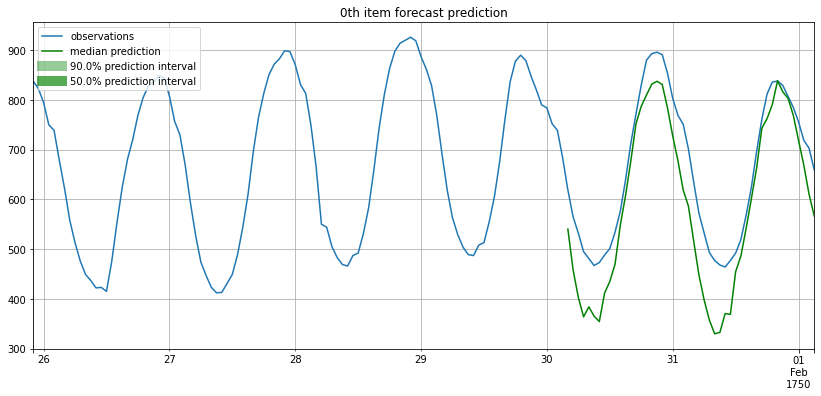

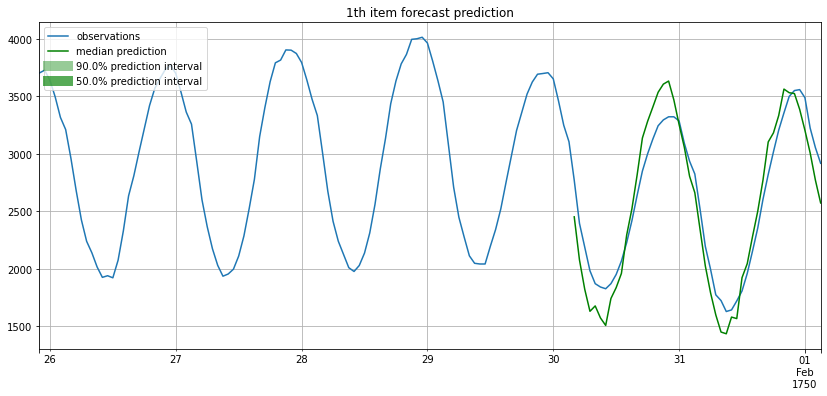

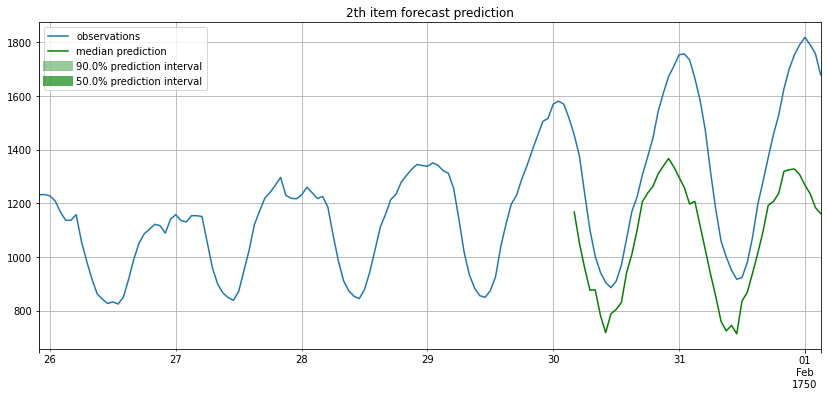

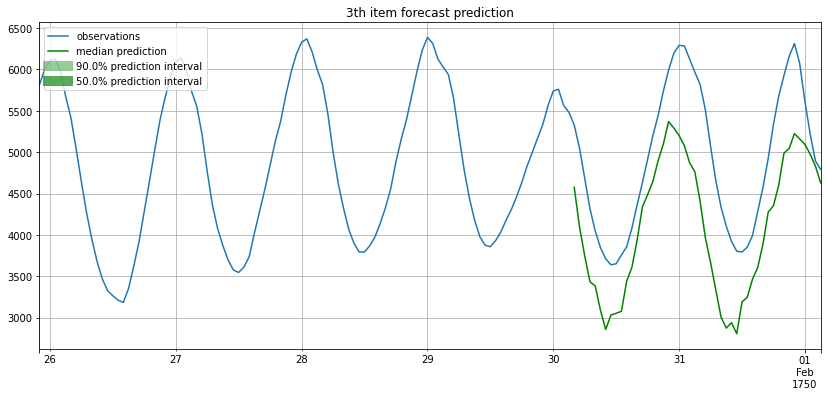

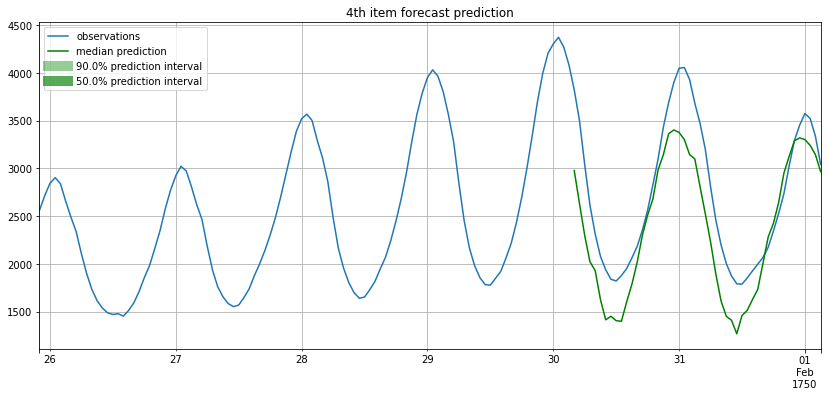

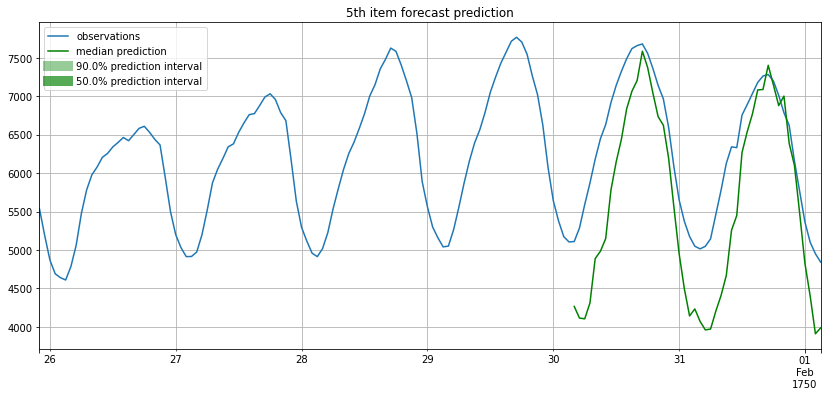

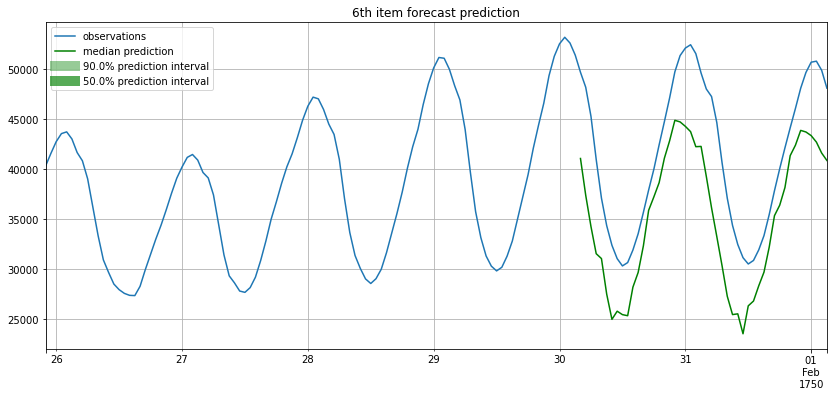

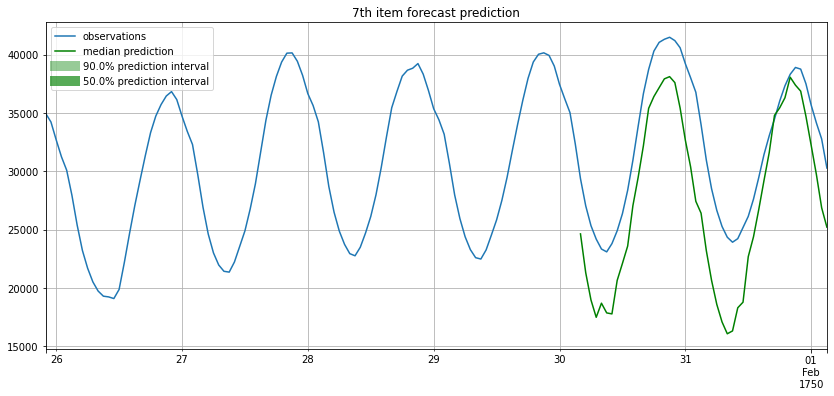

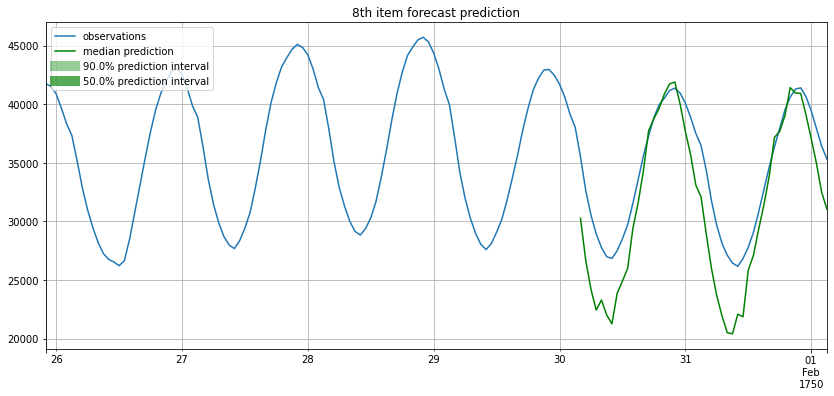

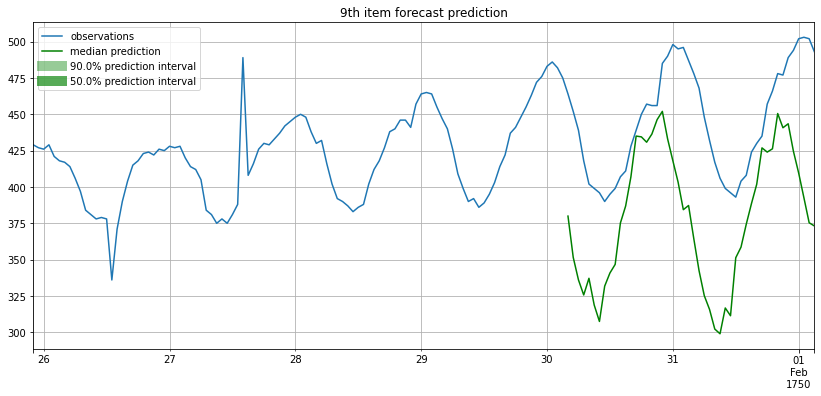

In [69]:
for i in range(10):
    plot_prob_forecast(i,nbts,nbforecast)

In [70]:
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(nbts), iter(nbforecast), num_series=len(dataset.test))

Running evaluation: 100%|███████████████████████████████████████████████████████████| 414/414 [00:01<00:00, 350.18it/s]


In [71]:
agg_metrics

{'MSE': 27881375.86213311,
 'abs_error': 16755104.878408432,
 'abs_target_sum': 145558863.59960938,
 'abs_target_mean': 7324.822041043146,
 'seasonal_error': 336.9046924038305,
 'MASE': 3.617317294141358,
 'MAPE': 0.19504396886761255,
 'sMAPE': 0.2206084635858566,
 'MSIS': 144.69269066591716,
 'QuantileLoss[0.1]': 3925653.4284949307,
 'Coverage[0.1]': 0.23832528180354265,
 'QuantileLoss[0.5]': 16755105.052455425,
 'Coverage[0.5]': 0.23832528180354265,
 'QuantileLoss[0.9]': 29584556.676415924,
 'Coverage[0.9]': 0.23832528180354265,
 'RMSE': 5280.281797606365,
 'NRMSE': 0.7208750967626768,
 'ND': 0.11510879148175347,
 'wQuantileLoss[0.1]': 0.02696952512141944,
 'wQuantileLoss[0.5]': 0.115108792677469,
 'wQuantileLoss[0.9]': 0.2032480602335186,
 'mean_absolute_QuantileLoss': 16755105.052455425,
 'mean_wQuantileLoss': 0.11510879267746903,
 'MAE_Coverage': 0.3538915727321525,
 'OWA': nan}

In [72]:
item_metrics

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0.0,6833.824219,3431.126465,31644.0,659.250000,42.371302,1.687033,0.121791,0.134299,67.481338,687.252094,0.020833,3431.126678,0.020833,6175.001263,0.020833
1,1.0,46304.484375,9281.642578,124149.0,2586.437500,165.107988,1.171158,0.078866,0.081060,46.846325,7786.089966,0.416667,9281.642212,0.416667,10777.194458,0.416667
2,2.0,102683.229167,13701.523438,65030.0,1354.791667,78.889053,3.618353,0.201847,0.228115,144.734117,2740.304688,0.000000,13701.523438,0.000000,24662.742188,0.000000
3,3.0,772577.833333,38797.984375,235783.0,4912.145833,258.982249,3.121030,0.165779,0.183733,124.841196,7759.596631,0.000000,38797.983154,0.000000,69836.369678,0.000000
4,4.0,200198.125000,18234.880859,131088.0,2731.000000,200.494083,1.894786,0.144648,0.160307,75.791436,4636.838672,0.104167,18234.880859,0.104167,31832.923047,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,409.0,2650.936849,2005.964111,5665.0,118.020833,24.726496,1.690127,0.359267,0.480872,67.605080,517.861221,0.104167,2005.964096,0.104167,3494.066971,0.104167
410,410.0,1754.809896,1271.948730,4968.0,103.500000,20.766026,1.276071,0.265293,0.335033,51.042857,260.828148,0.020833,1271.948726,0.020833,2283.069303,0.020833
411,411.0,1029.277669,841.430664,3232.0,67.333333,17.477564,1.002989,0.217107,0.254921,40.119567,304.561449,0.291667,841.430717,0.291667,1378.299986,0.291667
412,412.0,398.049154,587.444702,2077.0,43.270833,8.636752,1.417018,0.207225,0.243712,56.680709,157.435014,0.229167,587.444671,0.229167,1017.454327,0.229167
